In [23]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, KFold


In [4]:
# load the data 
train = pd.read_csv('/workspaces/codespaces-jupyter/Housing_dataset_train.csv')
test = pd.read_csv('/workspaces/codespaces-jupyter/Housing_dataset_test.csv')
sample_sub = pd.read_csv('/workspaces/codespaces-jupyter/Sample_submission.csv')

In [5]:
print(train.shape)
train.head()


(14000, 7)


,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [6]:
print(test.shape)
test.head()

(6000, 6)


,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [7]:
print(sample_sub.shape)
sample_sub.head()

(6000, 1)


,ID
0,845
1,1924
2,10718
3,12076
4,12254


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [9]:
train.nunique()

ID               10182
loc                 36
title               10
bedroom              9
bathroom             7
parking_space        6
price            10727
dtype: int64

In [10]:
train.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [11]:
test.nunique()

ID               5191
loc                36
title              10
bedroom             9
bathroom            7
parking_space       6
dtype: int64

In [12]:
train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [13]:
test.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
dtype: int64

In [14]:
train.duplicated().sum()

0

In [15]:
train.fillna(train.mean(), inplace=True)


In [16]:
train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom             0
bathroom            0
parking_space       0
price               0
dtype: int64

In [17]:
# fill with mode
train.fillna(train.mode().iloc[0], inplace=True)
train.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

In [18]:
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,14000.000000,14000.000000,14000.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.278917,1.900167,1.492378,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,3.000000,2.000000,2.000000,1.393990e+06
50%,3527.000000,4.308171,3.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,4.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [19]:
train.corr()

,ID,bedroom,bathroom,parking_space,price
ID,1.000000,0.215356,0.322075,0.154381,0.167093
bedroom,0.215356,1.000000,0.195321,0.095379,0.496913
bathroom,0.322075,0.195321,1.000000,0.153675,0.204804
parking_space,0.154381,0.095379,0.153675,1.000000,0.101578
price,0.167093,0.496913,0.204804,0.101578,1.000000


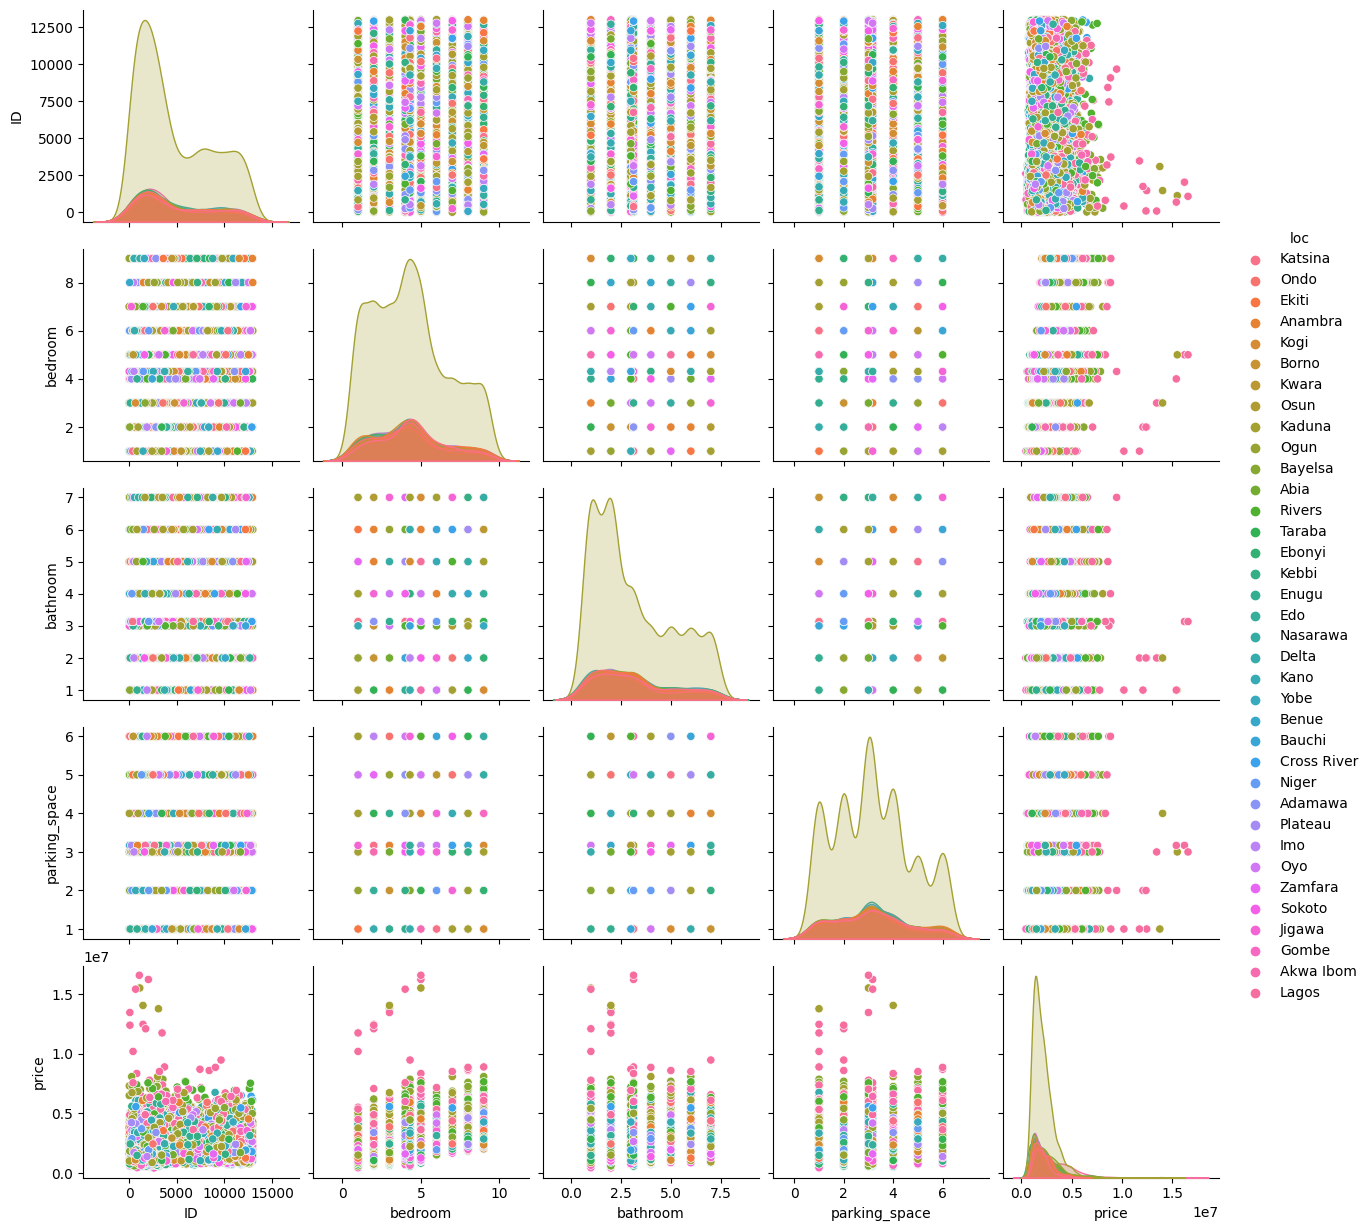

In [20]:
# Create a pair plot with hue
sns.pairplot(train, hue='loc', diag_kind='kde')
plt.show()

In [21]:
train1 = train.copy()
test1 = test.copy()

In [2]:
label_encoder = LabelEncoder()
train1['loc'] = label_encoder.fit_transform(train1['loc'])
train1['title'] = label_encoder.fit_transform(train1['title'])

In [22]:
test1 = test.copy()

test1['loc'] = label_encoder.fit_transform(test1['loc'])
test1['title'] = label_encoder.fit_transform(test1['title'])

In [23]:
# split the data into train and test
X = train1.drop(['price'], axis=1)
y = train1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# import the model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Initialize the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Neural Network': MLPRegressor(max_iter=1000)  # Increase max_iter for larger datasets
}


# Train and evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, rmse))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'RMSE'])

# Sort by RMSE in ascending order
results_df = results_df.sort_values(by='RMSE', ascending=True)

# Print the best model and its RMSE
print("Best Model:")
print(results_df.head(1))

Best Model:
               Model           RMSE
2  Gradient Boosting  649931.101521


In [25]:
results_df

,Model,RMSE
2,Gradient Boosting,6.499311e+05
1,Random Forest,6.891527e+05
3,AdaBoost,8.459356e+05
6,Decision Tree,8.895372e+05
0,Linear Regression,9.644319e+05
7,Neural Network,1.051936e+06
4,Support Vector Regression,1.149586e+06
5,K-Nearest Neighbors,1.161636e+06


In [26]:

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150], # Number of boosting stages to be run
    'learning_rate': [0.05, 0.1, 0.2], # Shrinkage parameter to prevent overfitting
    'max_depth': [3, 4, 5], # Maximum depth of the individual trees
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(gbr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize the Gradient Boosting Regressor with the best hyperparameters
best_gbr = GradientBoostingRegressor(**best_params)

# Train the model on the training data
best_gbr.fit(X_train, y_train)

# Predict on the test set
y_pred = best_gbr.predict(X_test)

# Calculate and print RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error for Gradient Boosting Regressor = {rmse:.2f}")

Root Mean Squared Error for Gradient Boosting Regressor = 610306.52


In [27]:
# Predict on the test set
y_pred1 = best_gbr.predict(test1)

# Save predictions to sample submission DataFrame
sample_sub['price'] = y_pred1

In [28]:
sample_sub['price'].head()

0    2.240321e+06
1    1.003347e+06
2    1.235461e+06
3    7.168510e+06
4    1.959276e+06
Name: price, dtype: float64

In [29]:
sample_sub.to_csv('/workspaces/codespaces-jupyter/Pred2.csv', index=False)

print("Predictions for the test data:")
print(sample_sub)

Predictions for the test data:
         ID         price
0       845  2.240321e+06
1      1924  1.003347e+06
2     10718  1.235461e+06
3     12076  7.168510e+06
4     12254  1.959276e+06
...     ...           ...
5995   1594  1.924723e+06
5996   2416  2.028476e+06
5997  10195  2.048487e+06
5998   9455  1.733854e+06
5999  11736  3.421902e+06

[6000 rows x 2 columns]


In [30]:
gbr1 = GradientBoostingRegressor()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150], # Number of boosting stages to be run
    'learning_rate': [0.05, 0.1, 0.2], # Shrinkage parameter to prevent overfitting
    'max_depth': [3, 4, 5], # Maximum depth of the individual trees
}

# Perform KFold cross-validation for hyperparameter tuning
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_params = None
best_rmse = float('inf')

for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:
            rmses = []
            for train_idx, val_idx in kf.split(X):
                X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
                y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

                gbr1 = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
                gbr1.fit(X_train, y_train)
                y_pred = gbr1.predict(X_val)
                rmse = mean_squared_error(y_val, y_pred, squared=False)
                rmses.append(rmse)

            mean_rmse = np.mean(rmses)
            if mean_rmse < best_rmse:
                best_rmse = mean_rmse
                best_params = {
                    'n_estimators': n_estimators,
                    'learning_rate': learning_rate,
                    'max_depth': max_depth
                }

# Initialize the Gradient Boosting Regressor with the best hyperparameters
best_gbr1 = GradientBoostingRegressor(**best_params)

# Train the model on the training data
best_gbr1.fit(X, y)

# Predict on the test set
y_pred = best_gbr1.predict(X_test)

# Calculate and print RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error for Gradient Boosting Regressor = {rmse:.2f}")

Root Mean Squared Error for Gradient Boosting Regressor = 526919.17


In [32]:
# Predict on the test set
y_pred1 = best_gbr1.predict(test1)

# Save predictions to sample submission DataFrame
sample_sub['price'] = y_pred1

In [33]:
sample_sub['price'].head()

0    2.319077e+06
1    1.097664e+06
2    1.111109e+06
3    7.978917e+06
4    2.002252e+06
Name: price, dtype: float64

In [34]:
sample_sub.to_csv('/workspaces/codespaces-jupyter/Pred3.csv', index=False)

print("Predictions for the test data:")
print(sample_sub)

Predictions for the test data:
         ID         price
0       845  2.319077e+06
1      1924  1.097664e+06
2     10718  1.111109e+06
3     12076  7.978917e+06
4     12254  2.002252e+06
...     ...           ...
5995   1594  1.944140e+06
5996   2416  2.012030e+06
5997  10195  2.037023e+06
5998   9455  1.624408e+06
5999  11736  3.422393e+06

[6000 rows x 2 columns]


In [43]:
train2 = train.copy()
test2 = test.copy()

In [44]:
train2.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [45]:
def perform_feature_engineering(df):
    # Handle Categorical Features: One-hot encoding for 'loc' and 'title'
    ohe = OneHotEncoder(drop='first', sparse=False)
    encoded_features = ohe.fit_transform(df[['loc', 'title']])
    encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(['loc', 'title']))

    # Concatenate the encoded features with the original DataFrame
    df = pd.concat([df.drop(['loc', 'title'], axis=1), encoded_df], axis=1)

    # Creating Interaction Features
    df['total_rooms'] = df['bedroom'] + df['bathroom']
    df['bedroom_to_bathroom_ratio'] = df['bedroom'] / df['bathroom']

    return df

In [46]:
    # Perform feature engineering using the function
train2 = perform_feature_engineering(train2)
test2 = perform_feature_engineering(test2)

In [47]:
# split the data into train and test
X = train2.drop(['price'], axis=1)
y = train2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# import the model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Initialize the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Neural Network': MLPRegressor(max_iter=1000)  # Increase max_iter for larger datasets
}


# Train and evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, rmse))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'RMSE'])

# Sort by RMSE in ascending order
results_df = results_df.sort_values(by='RMSE', ascending=True)

# Print the best model and its RMSE
print("Best Model:")
print(results_df.head(1))

Best Model:
               Model           RMSE
2  Gradient Boosting  624903.938492


In [50]:
gbr2 = GradientBoostingRegressor()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150], # Number of boosting stages to be run
    'learning_rate': [0.05, 0.1, 0.2], # Shrinkage parameter to prevent overfitting
    'max_depth': [3, 4, 5], # Maximum depth of the individual trees
}

# Perform KFold cross-validation for hyperparameter tuning
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_params = None
best_rmse = float('inf')

for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:
            rmses = []
            for train_idx, val_idx in kf.split(X):
                X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
                y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

                gbr2 = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
                gbr2.fit(X_train, y_train)
                y_pred = gbr2.predict(X_val)
                rmse = mean_squared_error(y_val, y_pred, squared=False)
                rmses.append(rmse)

            mean_rmse = np.mean(rmses)
            if mean_rmse < best_rmse:
                best_rmse = mean_rmse
                best_params = {
                    'n_estimators': n_estimators,
                    'learning_rate': learning_rate,
                    'max_depth': max_depth
                }

# Initialize the Gradient Boosting Regressor with the best hyperparameters
best_gbr2 = GradientBoostingRegressor(**best_params)

# Train the model on the training data
best_gbr2.fit(X, y)

# Predict on the test set
y_pred = best_gbr2.predict(X_test)

# Calculate and print RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error for Gradient Boosting Regressor = {rmse:.2f}")

Root Mean Squared Error for Gradient Boosting Regressor = 492538.12


In [52]:
# Predict on the test set
y_pred1 = best_gbr2.predict(test2)

# Save predictions to sample submission DataFrame
sample_sub['price'] = y_pred1

In [53]:
sample_sub.to_csv('/workspaces/codespaces-jupyter/Pred4.csv', index=False)

print("Predictions for the test data:")
print(sample_sub)

Predictions for the test data:
         ID         price
0       845  2.285581e+06
1      1924  1.101006e+06
2     10718  1.277015e+06
3     12076  8.778691e+06
4     12254  1.861463e+06
...     ...           ...
5995   1594  1.834692e+06
5996   2416  1.968629e+06
5997  10195  2.021948e+06
5998   9455  1.646518e+06
5999  11736  3.708074e+06

[6000 rows x 2 columns]


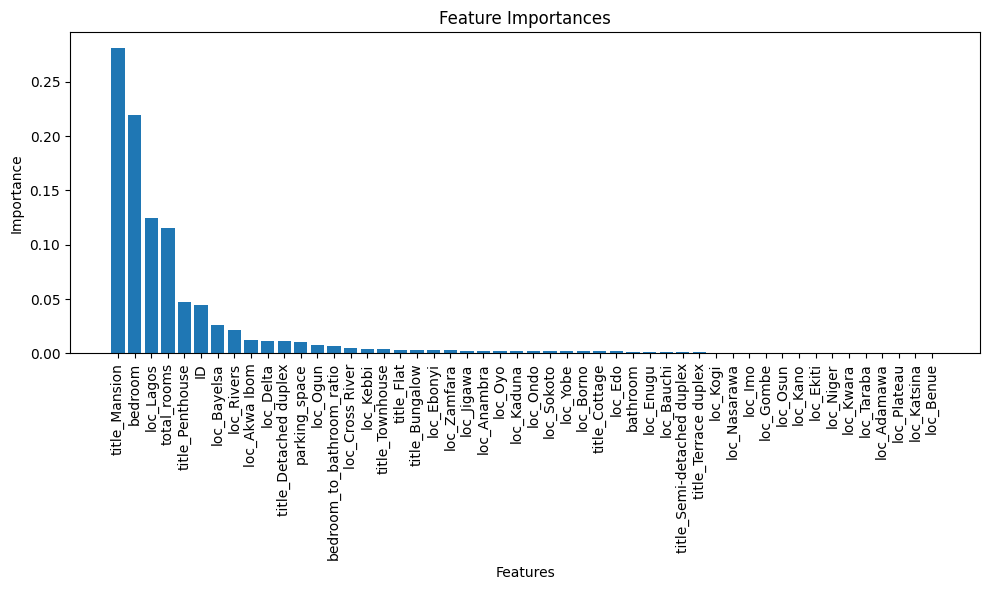

In [54]:
# Get feature importances
feature_importances = best_gbr2.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features based on importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [44]:
\

SyntaxError: incomplete input (3477860531.py, line 1)